In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rapt

In [2]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 6)

# A First Example: Particle in dipole field

Our objective is to trace the path of a proton in the Earth's magnetic field.

## Initialize the magnetic field

A particle tracer works with a field object. A field object comprises a magnetic field function, an electric field function, and other member functions needed for other tasks. The trajectory will be traced by making requests to this field object.

The file `fields.py` defines available field objects. To see how new field objects can be created, see the notebook `Creating new fields.ipynb`.

Here we initialize an Earth dipole object. This field is time-independent and purely magnetic (no electric field), therefore the kinetic energy of the proton stays the same, except for numerical error.

In [3]:
f = rapt.fields.EarthDipole()

## Initialize the particle

We initialize a proton at Cartesian coordinates $(6R_e, 0,0)$, with velocity $(0,-10^7\mathrm{m/s},0)$. RAPT uses Cartesian coordinates and SI units only. To specify the initial position, we use the built-in constant `rapt.Re`, which stores the value of the radius of the Earth.

In [4]:
p = rapt.Particle(pos=(6*rapt.Re, 0,0), # initial position, meters, Cartesian coordinates
                  vel=(0, -1e7, 0),     # initial velocity, meters/sec, Cartesian coordinates
                  t0=0,                 # initial time
                  mass=rapt.m_pr,       # mass of the particle (kg)
                  charge=rapt.e,        # charge of the particle (C)
                  field=f)

## Follow the proton for one second
The `Particle.advance()` method calculates the trajectory for a given amount of seconds and stores the trajectory internally.

In [5]:
p.advance(1)   # Advance the solution for 1 second.

The proton is initialized at the equatorial plane with a velocity that is perpendicular to the field; therefore its motion is confined to the xy-plane.

The x and y coordinates of the particle can be accessed with the `Particle.getx()` and `Particle.gety()` methods. We use *matplotlib* to display the trajectory.

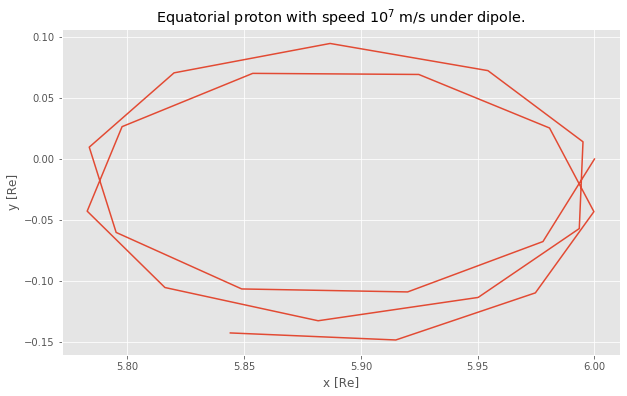

In [6]:
plt.plot(p.getx()/rapt.Re, p.gety()/rapt.Re)
plt.xlabel("x [Re]")
plt.ylabel("y [Re]")
plt.title("Equatorial proton with speed $10^7$ m/s under dipole.");

We expect that the z coordinate stays at zero. The methods `Particle.gett()` and `Particle.getz()` return the arrays of time and z-coordinate values, respectively.

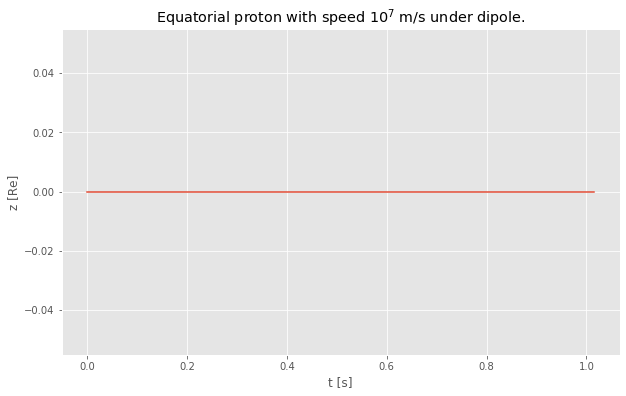

In [7]:
plt.plot(p.gett(), p.getz())
plt.xlabel("t [s]")
plt.ylabel("z [Re]")
plt.title("Equatorial proton with speed $10^7$ m/s under dipole.");

## Follow another proton in the same field
We can initialize another particle using the same field model and compare their trajectories. Let us initialize another equatorial proton that starts at the same location, with half the speed.

In [8]:
p2 = rapt.Particle(pos=(6*rapt.Re, 0,0), # initial position, meters, Cartesian coordinates
                  vel=(0, -5e6, 0),     # initial velocity, meters/sec, Cartesian coordinates
                  t0=0,                 # initial time
                  mass=rapt.m_pr,       # mass of the particle (kg)
                  charge=rapt.e,        # charge of the particle (C)
                  field=f)

In [9]:
p2.advance(1)

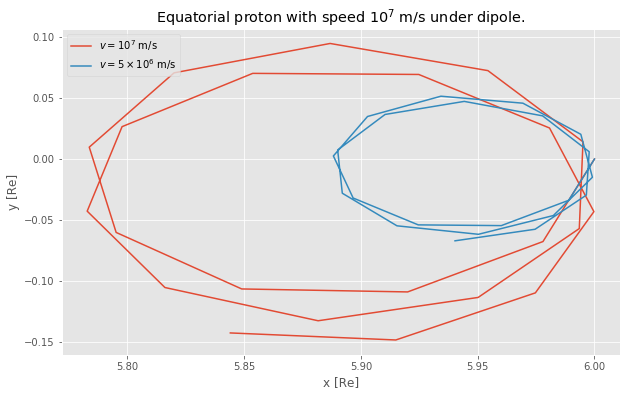

In [10]:
plt.plot(p.getx()/rapt.Re, p.gety()/rapt.Re, label="$v=10^7$ m/s")
plt.plot(p2.getx()/rapt.Re, p2.gety()/rapt.Re, label="$v=5\\times 10^6$ m/s")
plt.xlabel("x [Re]")
plt.ylabel("y [Re]")
plt.legend(loc='upper left')
plt.title("Equatorial proton with speed $10^7$ m/s under dipole.");

## Advance the trajectory
To follow the trajectory further, we call `advance` again. Previous data is kept, and the new set of points are appended to the existing trajectory.

In [11]:
p.advance(1)

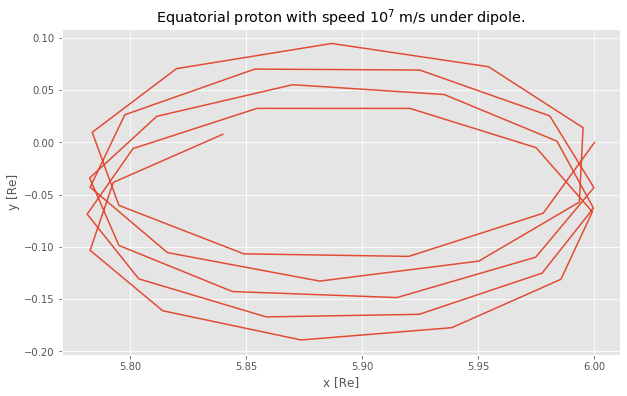

In [12]:
plt.plot(p.getx()/rapt.Re, p.gety()/rapt.Re)
plt.xlabel("x [Re]")
plt.ylabel("y [Re]")
plt.title("Equatorial proton with speed $10^7$ m/s under dipole.");

## Make the curve smoother
The trajectory does not look smooth because the default sampling rate is low. For a smoother trajectory we can reset the parameter `params["cyclotronresolution"]`. This parameter gives the fraction of the cyclotron period between consecutive time steps. The default value is 10, which means that the time step is one-tenth of the cyclotron period.

In [13]:
rapt.params['cyclotronresolution'] = 20

In [14]:
p.advance(5)   # follow particle for 5 more seconds

We see that the trajectory is more finely sampled in the last 5 seconds (lower y values):

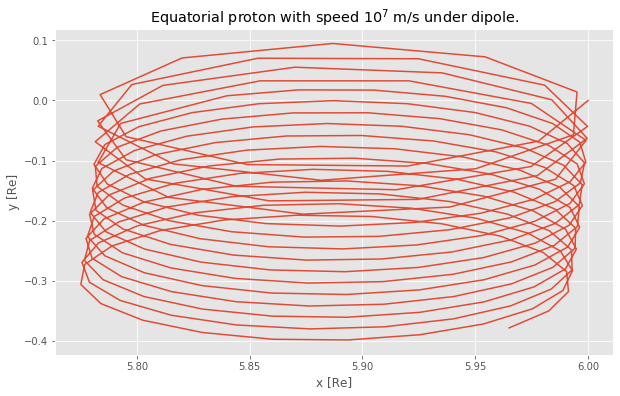

In [15]:
plt.plot(p.getx()/rapt.Re, p.gety()/rapt.Re)
plt.xlabel("x [Re]")
plt.ylabel("y [Re]")
plt.title("Equatorial proton with speed $10^7$ m/s under dipole.");

Note that a low sampling rate does not mean a lower accuracy. The code uses an adaptive solver whose accuracy is controlled with the `rapt.params['solvertolerances']` parameter. If a large step size is given, the solver subdivides the interval until it can meet the tolerance requirements.

## Initialize the particle with kinetic energy and pitch angle
In practice, particles are often initialized by specifying their kinetic energy and pitch angle. The methods `Particle.setpa()` and `Particle.setke()` reset the velocity vector so that the particle has the desired pitch angle and kinetic energy. **After this, the object is then re-initialized in the original starting point.**

In [16]:
p.setpa(60)  # set pitch angle to 60 degrees
p.setke(1e6) # set kinetic energy to 1MeV

In [17]:
p.advance(20)

Display the trajectory in three dimensions.

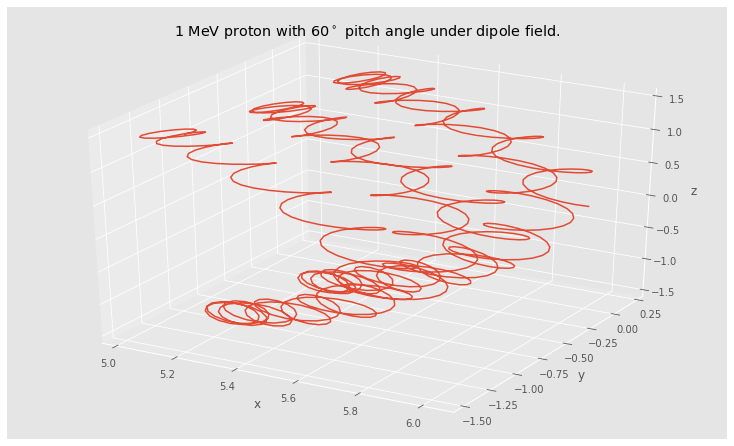

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot( p.getx()/rapt.Re, p.gety()/rapt.Re, p.getz()/rapt.Re, label='Particle')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1 MeV proton with 60$^\circ$ pitch angle under dipole field.');